# José Ligorría
##  KMeans

In [28]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('C:/Users/jose-/Documents/Maestria/Statistical_Learning2/Practica1/estaturas.csv')

In [3]:
data.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


Normalizamos las observaciones

In [4]:
Columns_name = list(data.columns)

In [5]:
dataset = data.copy()
for i in Columns_name:
    dataset[i] = (data[i] - np.mean(data[i]))/np.std(data[i])

Procedemos a crear la función que devuelve el costo, los centroides y el identificador del cluster al que pertenece cada observación del dataset inidicado.

In [6]:
def Hard_Kmeans(dataset,k = 5,seed = 1):
    n_obs = len(dataset)
    centroids = dataset.sample(n = k, random_state = seed)
    n_iter = 0
    #tmp = datetime.now()
    while n_iter < 100: 
        n_iter += 1
        dist = pd.DataFrame(index=dataset.index)
        for i in range(k):
            piv_centroid = np.array(centroids.iloc[i])
            piv_df = (dataset-piv_centroid)**2
            piv_df = pd.DataFrame({i:piv_df.sum(axis=1)})
            dist = dist.join(piv_df)    
            #print(piv_centroid)
        min_dists = np.array(dist.min(axis=1))
        cost = np.mean(min_dists)
        centroids_list = np.array(dist.idxmin(axis=1))
        new_centroids = pd.DataFrame(index=list(range(k)), columns=['Estatura','Edad']).fillna(0)
        for i in range(k):
            piv_list = np.array(range(n_obs))[centroids_list==i]
            #print(piv_list)
            #print(i,len(piv_list))
            new_centroids.iloc[i] = dataset.iloc[piv_list].mean()
        df = pd.concat([centroids, new_centroids])
        df = df.reset_index(drop=True)
        df_gpby = df.groupby(list(df.columns))
        idx = [x[0] for x in df_gpby.groups.values() if len(x) == 2]
        if n_iter % 5 ==0:
            print('vamos por la iteracion ', n_iter, ' con los centroides: ',centroids)
        if len(idx) == k:
            break
        centroids = new_centroids
    #tmp-datetime.now()
    return cost,centroids,centroids_list

In [7]:
cost1,centroids1,centroids_list1 = Hard_Kmeans(dataset,k=2)
cost2,centroids2,centroids_list2 = Hard_Kmeans(dataset,k=3)
cost3,centroids3,centroids_list3 = Hard_Kmeans(dataset,k=4)
cost4,centroids4,centroids_list4 = Hard_Kmeans(dataset,k=5)
cost5,centroids5,centroids_list5 = Hard_Kmeans(dataset,k=6)

In [8]:
cost1,cost2,cost3,cost4,cost5

(1.212397359623414,
 0.5426103757551495,
 0.45863203589820195,
 0.4128993433946882,
 0.3053226090620766)

Comparamos los resultados obtenidos de la función creada con el resultado obtenido por la función en sklearn.

In [9]:
np_dataset = np.array(dataset).astype('float')
sk_kmeans = {} 
for i in range(2,7):
    kmeans = KMeans(n_clusters = i,random_state = 0).fit(np_dataset)
    piv_str = 'sk_centroids_list' + str(i-1)
    sk_kmeans[piv_str] = kmeans.labels_
    piv_str = 'sk_centroids' + str(i-1)
    sk_kmeans[piv_str] = kmeans.cluster_centers_

In [10]:
print(pd.crosstab(np.array(centroids_list1), np.array(sk_kmeans['sk_centroids_list1']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list2), np.array(sk_kmeans['sk_centroids_list2']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list3), np.array(sk_kmeans['sk_centroids_list3']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list4), np.array(sk_kmeans['sk_centroids_list4']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list5), np.array(sk_kmeans['sk_centroids_list5']), rownames = ['Creado'], colnames = ['sklearn']))

sklearn   0  1
Creado        
0        21  0
1         0  8
sklearn   0  1  2
Creado           
0        12  0  0
1         0  8  0
2         0  0  9
sklearn  0  1  2  3
Creado             
0        6  0  6  0
1        0  2  0  0
2        0  0  1  8
3        0  6  0  0
sklearn  0  1  2  3  4
Creado                
0        0  6  0  0  6
1        0  0  0  2  0
2        0  0  7  0  1
3        3  0  0  1  0
4        2  0  1  0  0
sklearn  0  1  2  3  4  5
Creado                   
0        0  0  0  0  6  0
1        0  2  0  0  0  0
2        0  0  5  0  0  2
3        0  1  0  3  0  0
4        0  0  0  3  0  0
5        6  0  1  0  0  0


Donde podemos ver que no se crean los mismos grupos, por lo que el modelo opera de forma diferente.

Creamos una gráfica con el cluster que nos dio menos costo.

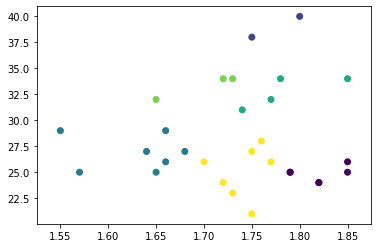

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 6))
plt.scatter(data['Estatura'], data['Edad'],c = centroids_list5)

In [12]:
sk_gmm = {} 
for i in range(2,7):
    gmm = GaussianMixture(n_components = i).fit(np_dataset)
    labels = gmm.predict(np_dataset)
    probs = gmm.predict_proba(np_dataset)
    piv_str = 'sk_centroids_list' + str(i-1)
    sk_gmm[piv_str] = labels
    piv_str = 'sk_prob_centroids_list' + str(i-1)
    sk_gmm[piv_str] = probs
    


In [13]:
print(pd.crosstab(np.array(centroids_list1), np.array(sk_gmm['sk_centroids_list1']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list2), np.array(sk_gmm['sk_centroids_list2']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list3), np.array(sk_gmm['sk_centroids_list3']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list4), np.array(sk_gmm['sk_centroids_list4']), rownames = ['Creado'], colnames = ['sklearn']))
print(pd.crosstab(np.array(centroids_list5), np.array(sk_gmm['sk_centroids_list5']), rownames = ['Creado'], colnames = ['sklearn']))

sklearn   0  1
Creado        
0        18  3
1         0  8
sklearn  0  1  2
Creado          
0        8  0  4
1        0  8  0
2        0  1  8
sklearn  0  1  2  3
Creado             
0        5  0  1  6
1        0  2  0  0
2        0  1  8  0
3        0  6  0  0
sklearn  0   1  2  3  4
Creado                 
0        0  12  0  0  0
1        0   0  2  0  0
2        5   1  0  2  0
3        0   0  0  0  4
4        1   0  2  0  0
sklearn  0  1  2  3  4  5
Creado                   
0        6  0  0  0  0  0
1        0  2  0  0  0  0
2        0  0  5  0  2  0
3        0  0  0  3  0  1
4        0  0  1  2  0  0
5        7  0  0  0  0  0


Donde podemos ver que los cluster creados son distintos.

In [14]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 6,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [15]:
gmm_cost = {}
for k in range(2,7):
    new_centroids = pd.DataFrame(index=list(range(k)), columns=['Estatura','Edad']).fillna(0)
    n_obs = len(dataset)
    dist = pd.DataFrame(index=dataset.index)
    for i in range(k):
        piv_list = np.array(range(n_obs))[labels==i]
        #print(piv_list)
        #print(i,len(piv_list))
        new_centroids.iloc[i] = dataset.iloc[piv_list].mean()
        piv_centroid = np.array(new_centroids.iloc[i])
        piv_df = (dataset-piv_centroid)**2
        piv_df = pd.DataFrame({i:piv_df.sum(axis=1)})
        dist = dist.join(piv_df)    
        #print(piv_centroid)
    min_dists = np.array(dist.min(axis=1))
    cost = np.mean(min_dists)
    gmm_cost[k] = cost

In [16]:
gmm_cost

{2: 1.8209052411865798,
 3: 0.7611372477325898,
 4: 0.48831375664208115,
 5: 0.3776496761384344,
 6: 0.3152211411094742}

In [17]:
cost1,cost2,cost3,cost4,cost5

(1.212397359623414,
 0.5426103757551495,
 0.45863203589820195,
 0.4128993433946882,
 0.3053226090620766)

De los costos anteriores podemos ver que ambos modelos tienen resultados similares hasta que se consideran 6 cluster. 

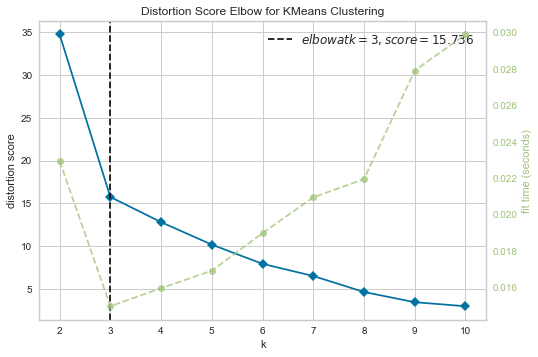

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10)
model.fit(np_dataset)
model.show()

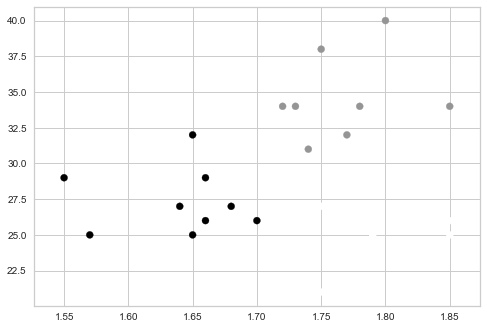

In [24]:
colors = cm.rainbow(np.linspace(0, 1, 3))
plt.scatter(data['Estatura'], data['Edad'],c = centroids_list2)

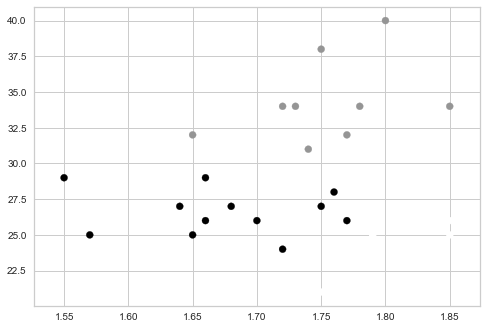

In [25]:
colors = cm.rainbow(np.linspace(0, 1, 3))
plt.scatter(data['Estatura'], data['Edad'],c = sk_gmm['sk_centroids_list2'])

## Detencción de Anomalías

In [86]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):

        predictions = (probs < epsilon) 
        #print(predictions)
        #break
        f = f1_score(gt, predictions,average='binary')
        #print(f)
        #print('------')
        if f > best_f1:
            #print('----')
            best_f1 = f
            best_epsilon = epsilon
    #return 1
    return best_f1, best_epsilon

In [82]:
cv = pd.read_csv('C:/Users/jose-/Documents/Maestria/Statistical_Learning2/Practica1/validacion.csv')
gt = pd.read_csv('C:/Users/jose-/Documents/Maestria/Statistical_Learning2/Practica1/anomalias.csv')
cv_data = np.array(cv).astype('float')
gt_data = np.array(gt).astype('float')

In [83]:
cv_data

array([[1.820e+00, 2.500e+01],
       [1.800e+00, 2.700e+01],
       [1.600e+00, 3.100e+01],
       [1.600e+00, 3.500e+01],
       [1.820e+00, 3.000e+01],
       [1.760e+00, 3.200e+01],
       [1.790e+00, 3.100e+01],
       [1.610e+00, 3.100e+01],
       [2.500e-01, 2.400e+00],
       [1.751e+02, 2.500e+00],
       [1.500e-01, 2.500e+02],
       [1.500e+02, 1.400e+01]])

In [84]:
mu, sigma = estimateGaussian(np_dataset)
p = multivariateGaussian(np_dataset,mu,sigma)

In [88]:
p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
print(ep)

9.528833693224913e-06


In [89]:
fscore

0.39999999999999997

De donde podemos ver que no realizamos el mejor trabajo detectando anomalías.